In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer

In [2]:
df = pd.read_csv('emails.csv')

In [3]:
df

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


# EDA

In [4]:
df.drop(['Unnamed: 0'], axis=1)

,filename,Message-ID,content,Class
0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...
48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48076 non-null  int64 
 1   filename    48076 non-null  object
 2   Message-ID  48076 non-null  object
 3   content     48076 non-null  object
 4   Class       48076 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [6]:
df.shape

(48076, 5)

In [7]:
df.isnull().sum()

Unnamed: 0    0
filename      0
Message-ID    0
content       0
Class         0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
class_counts = df['Class'].value_counts()
print(class_counts)

Class
Non Abusive    44666
Abusive         3410
Name: count, dtype: int64


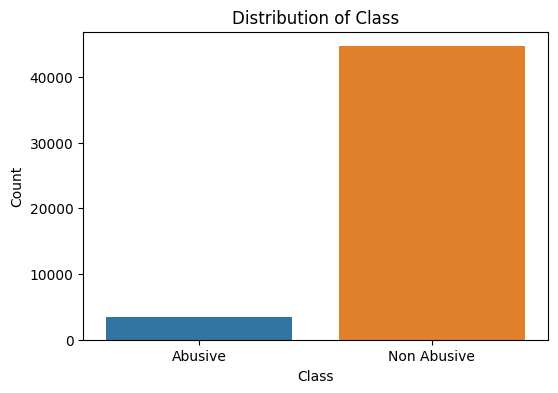

In [10]:
#distribution of class
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Class')
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

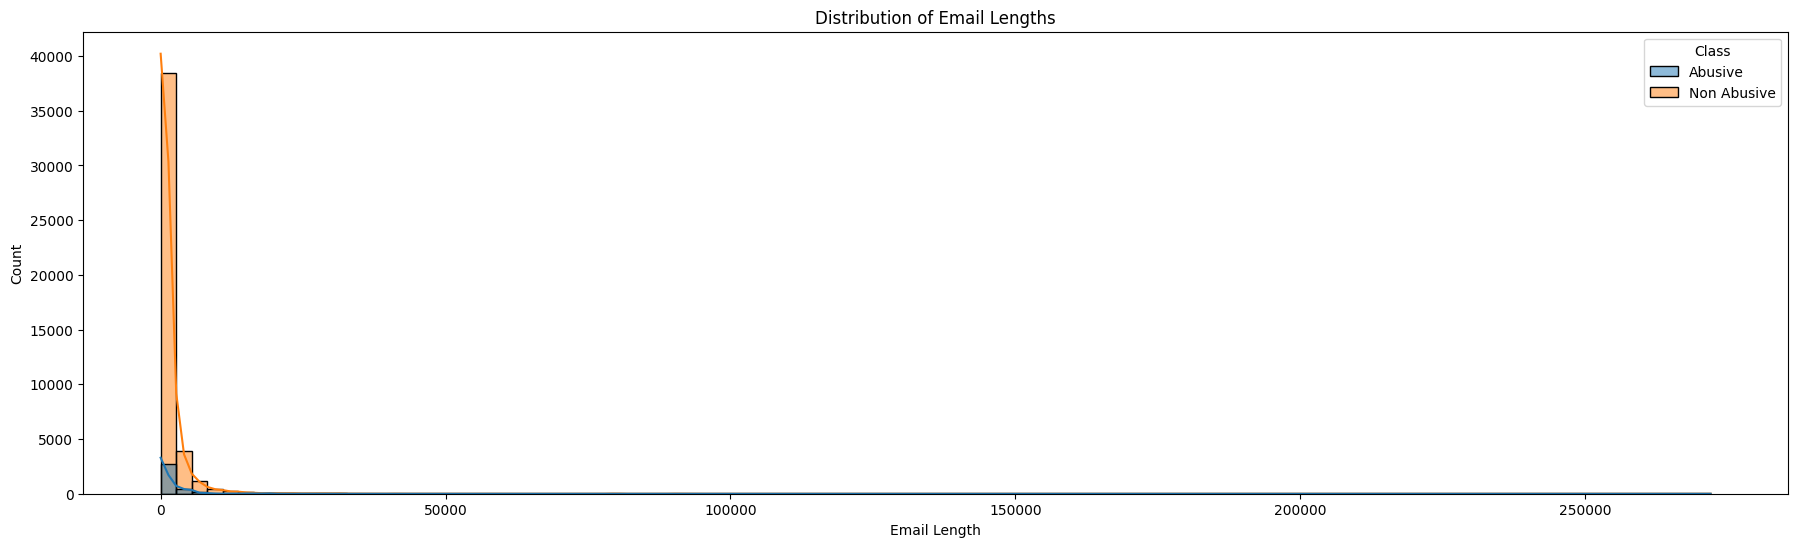

In [11]:
# Visualize the distribution of email lengths
df['email_length'] = df['content'].apply(len)
plt.figure(figsize=(22, 6))
sns.histplot(data=df, x='email_length', hue='Class', bins=100, kde=True)
plt.title('Distribution of Email Lengths')
plt.xlabel('Email Length')
plt.ylabel('Count')
plt.show()

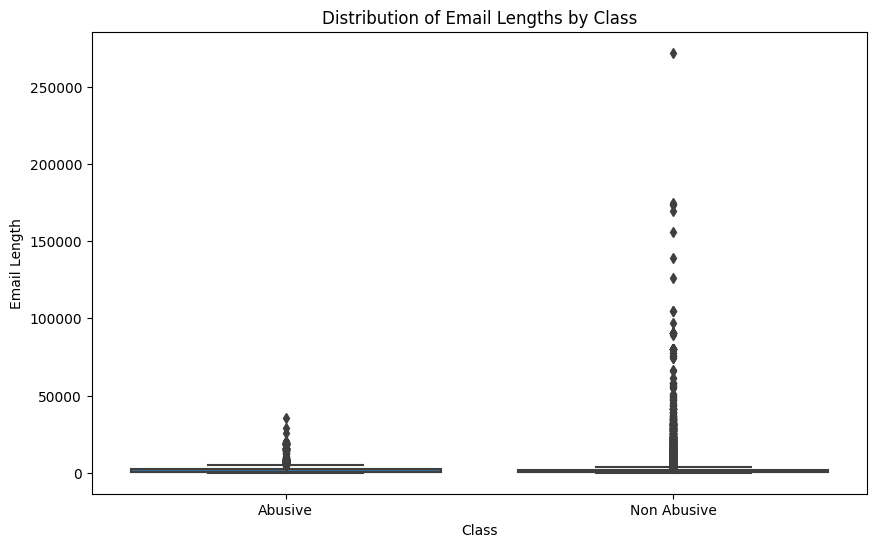

In [12]:
# Email Lengths distribution by class
df['email_length'] = df['content'].apply(len)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Class', y='email_length')
plt.title('Distribution of Email Lengths by Class')
plt.xlabel('Class')
plt.ylabel('Email Length')
plt.show()

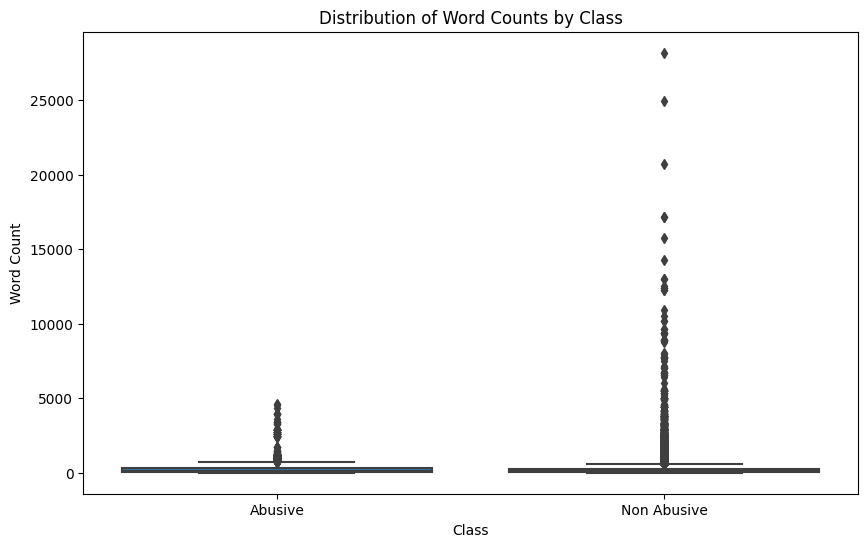

In [13]:
# Word count distribution by class
df['word_count'] = df['content'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Class', y='word_count')
plt.title('Distribution of Word Counts by Class')
plt.xlabel('Class')
plt.ylabel('Word Count')
plt.show()

In [14]:
df[df['Class'] == 'Abusive']

,Unnamed: 0,filename,Message-ID,content,Class,email_length,word_count
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,220,37
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive,8,2
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive,612,90
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive,505,69
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,203,33
...,...,...,...,...,...,...,...
3405,3405,zipper-a/sent_items/367.,<14695903.1075861170942.JavaMail.evans@thyme>,There is a lot of confused bullshit floating a...,Abusive,57,9
3406,3406,zipper-a/sent_items/37.,<6945064.1075842017346.JavaMail.evans@thyme>,"wow, three weeks away from the kids ! brave an...",Abusive,270,55
3407,3407,zipper-a/sent_items/382.,<1237276.1075861171270.JavaMail.evans@thyme>,\ngot this from late friday. have you ever hea...,Abusive,535,74
3408,3408,zufferli-j/deleted_items/109.,<30324039.1075842024203.JavaMail.evans@thyme>,"\n\n -----Original Message-----\nFrom: \t""Enge...",Abusive,5911,1110


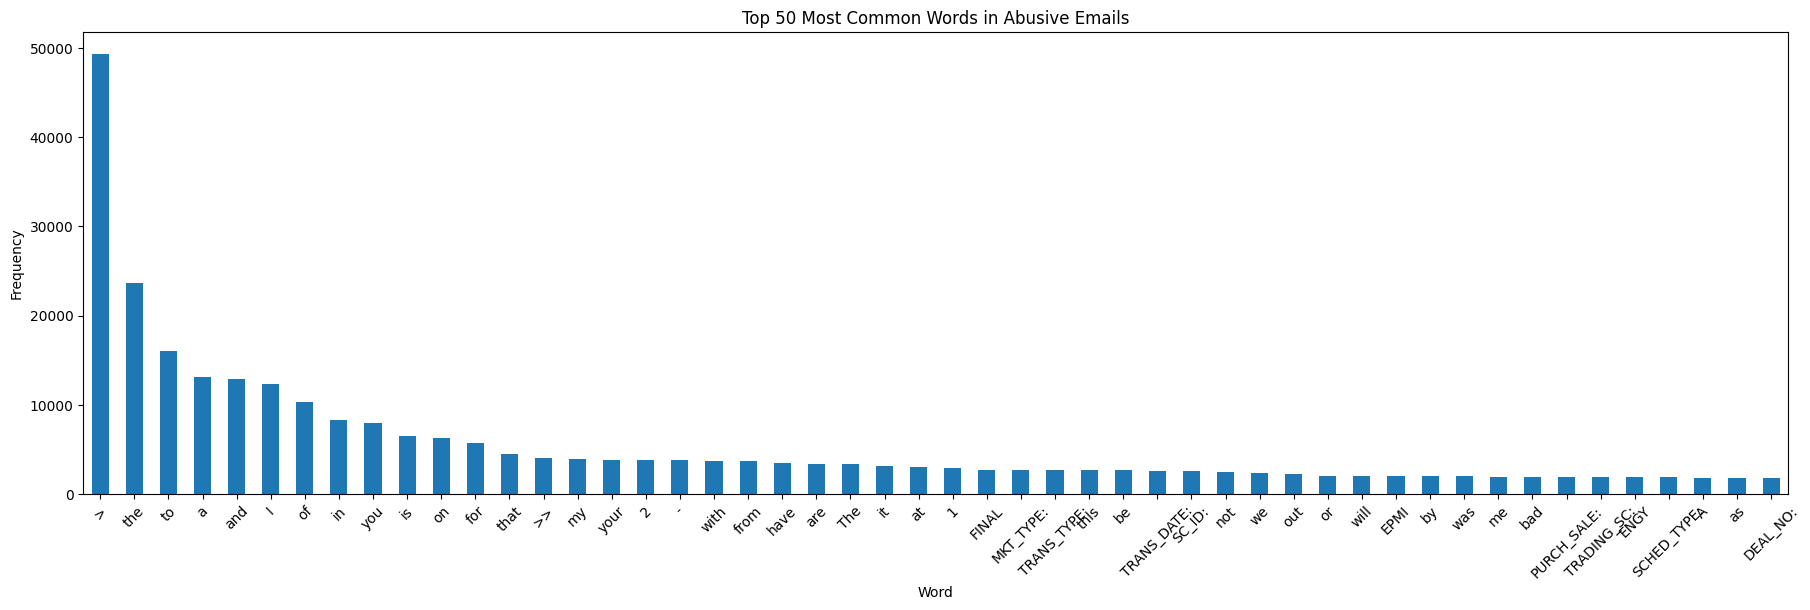

In [15]:
# Most common words in abusive emails
abusive_emails = df[df['Class'] == 'Abusive']
abusive_words = ' '.join(abusive_emails['content']).split()
abusive_word_freq = pd.Series(abusive_words).value_counts()
plt.figure(figsize=(22, 6))
abusive_word_freq[:50].plot(kind='bar')
plt.title('Top 50 Most Common Words in Abusive Emails')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [16]:
df[df['Class'] == 'Non Abusive']

,Unnamed: 0,filename,Message-ID,content,Class,email_length,word_count
3410,3410,allen-p/_sent_mail/1.,<18782981.1075855378110.JavaMail.evans@thyme>,Here is our forecast\n\n,Non Abusive,23,4
3411,3411,allen-p/_sent_mail/10.,<15464986.1075855378456.JavaMail.evans@thyme>,Traveling to have a business meeting takes the...,Non Abusive,786,139
3412,3412,allen-p/_sent_mail/100.,<24216240.1075855687451.JavaMail.evans@thyme>,test successful. way to go!!!,Non Abusive,30,5
3413,3413,allen-p/_sent_mail/1000.,<13505866.1075863688222.JavaMail.evans@thyme>,"Randy,\n\n Can you send me a schedule of the s...",Non Abusive,187,34
3414,3414,allen-p/_sent_mail/1001.,<30922949.1075863688243.JavaMail.evans@thyme>,Let's shoot for Tuesday at 11:45.,Non Abusive,35,6
...,...,...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive,994,133
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive,1111,190
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive,8248,1268
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive,15655,2497


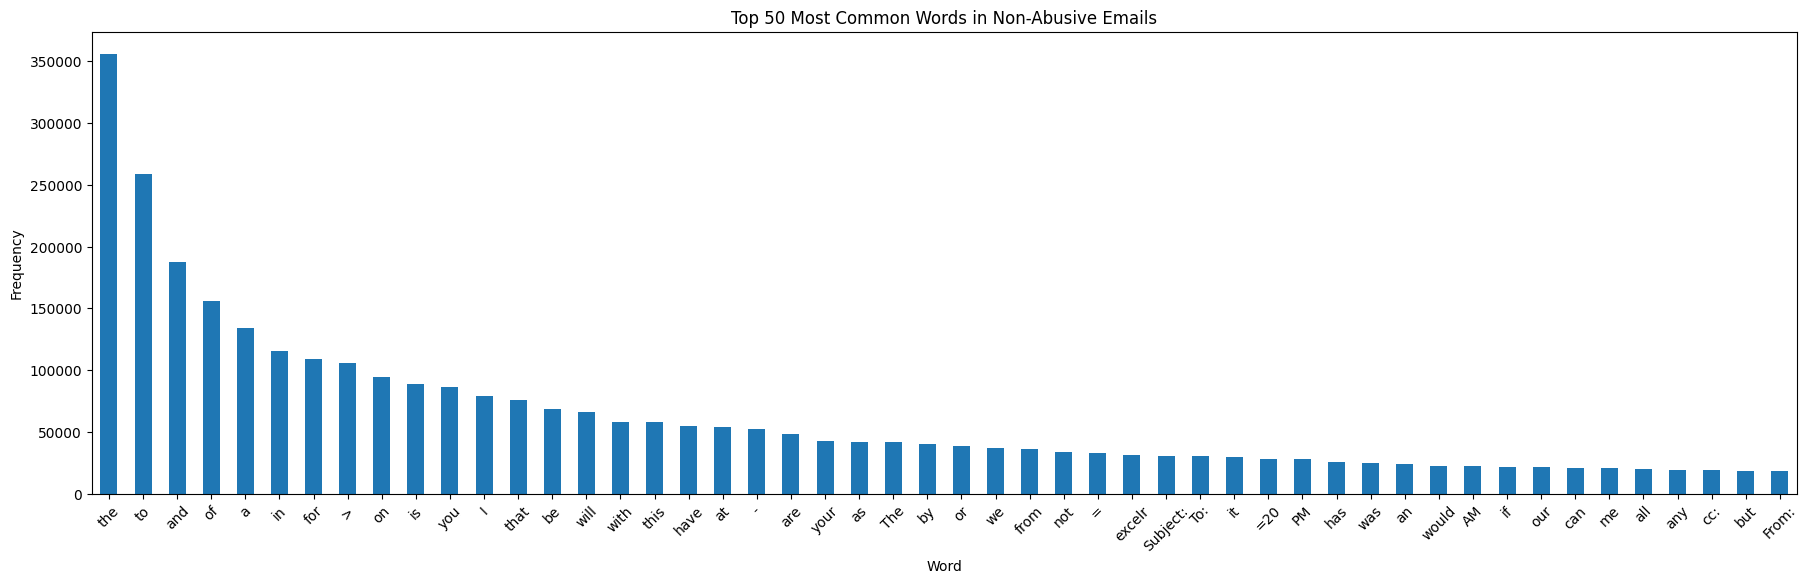

In [17]:
# Most common words in non-abusive emails
non_abusive_emails = df[df['Class'] == 'Non Abusive']
non_abusive_words = ' '.join(non_abusive_emails['content']).split()
non_abusive_word_freq = pd.Series(non_abusive_words).value_counts()
plt.figure(figsize=(22, 6))
non_abusive_word_freq[:50].plot(kind='bar')
plt.title('Top 50 Most Common Words in Non-Abusive Emails')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Tokenization

In [18]:
def clean_str(string, reg = RegexpTokenizer(r'[a-z]+')):
    # Clean a string with RegexpTokenizer
    string = string.lower()
    tokens = reg.tokenize(string)
    return " ".join(tokens)

In [19]:
print('Before cleaning:')
df

Before cleaning:


,Unnamed: 0,filename,Message-ID,content,Class,email_length,word_count
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,220,37
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive,8,2
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive,612,90
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive,505,69
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,203,33
...,...,...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive,994,133
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive,1111,190
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive,8248,1268
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive,15655,2497


In [20]:
print('After cleaning:')
df['content'] = df['content'].apply(lambda string: clean_str(string))
df

After cleaning:


,Unnamed: 0,filename,Message-ID,content,Class,email_length,word_count
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit john j lavorato excelr pm to john arn...,Abusive,220,37
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive,8,2
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,gentlemen the following champagne is available...,Abusive,612,90
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i ve taken so long just been trying to f...,Abusive,505,69
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole john j lavorato excelr am to john arno...,Abusive,203,33
...,...,...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,dear market participants please note the chang...,Non Abusive,994,133
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,according to my fancy ciphering we made for th...,Non Abusive,1111,190
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,business highlights weather group let s give a...,Non Abusive,8248,1268
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,welcome to diamonds newsletter issue special h...,Non Abusive,15655,2497


### Stemming words

In [21]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])
df['content']=df['content'].apply(stemming)
df

,Unnamed: 0,filename,Message-ID,content,Class,email_length,word_count
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit john j lavorato excelr pm to john arn...,Abusive,220,37
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive,8,2
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,gentlemen the following champagne is available...,Abusive,612,90
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i ve taken so long just been trying to f...,Abusive,505,69
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole john j lavorato excelr am to john arno...,Abusive,203,33
...,...,...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,dear market participants please note the chang...,Non Abusive,994,133
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,according to my fancy ciphering we made for th...,Non Abusive,1111,190
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,business highlights weather group let s give a...,Non Abusive,8248,1268
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,welcome to diamonds newsletter issue special h...,Non Abusive,15655,2497
